In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Phishing/PhishTank/Base_classifier_result(pre URL-HTML cross)(2).csv")
data

,labels,rfc_prediction_non,rfc_prediction_phish,svc_prediction_non,svc_prediction_phish,lr_prediction_non,lr_prediction_phish
0,1,0.005271,0.994729,0.691692,0.308308,0.277956,0.722044
1,1,0.006029,0.993971,0.706859,0.293141,0.374383,0.625617
2,1,0.022000,0.978000,0.706885,0.293115,0.457641,0.542359
3,1,0.000000,1.000000,0.332890,0.667110,0.448804,0.551196
4,0,0.999658,0.000342,0.788914,0.211086,0.676933,0.323067
...,...,...,...,...,...,...,...
4647,1,0.425595,0.574405,0.354900,0.645100,0.758620,0.241380
4648,0,0.979070,0.020930,0.494299,0.505701,0.999987,0.000013
4649,0,0.999658,0.000342,0.788491,0.211509,0.675764,0.324236
4650,0,0.999218,0.000782,0.798223,0.201777,0.922949,0.077051


In [4]:
data.shape

(4652, 7)

In [5]:
data.columns

Index(['labels', 'rfc_prediction_non', 'rfc_prediction_phish',
       'svc_prediction_non', 'svc_prediction_phish', 'lr_prediction_non',
       'lr_prediction_phish'],
      dtype='object')

In [6]:
data.describe()

,labels,rfc_prediction_non,rfc_prediction_phish,svc_prediction_non,svc_prediction_phish,lr_prediction_non,lr_prediction_phish
count,4652.000000,4652.000000,4652.000000,4652.000000,4652.000000,4652.000000,4.652000e+03
mean,0.428418,0.574068,0.425932,0.565376,0.434624,0.674942,3.250584e-01
std,0.494903,0.469916,0.469916,0.218680,0.218680,0.255081,2.550813e-01
min,0.000000,0.000000,0.000212,0.201057,0.020145,0.002662,2.885587e-25
25%,0.000000,0.005139,0.002443,0.332891,0.211509,0.444820,5.741893e-02
50%,0.000000,0.955267,0.044733,0.532841,0.467159,0.682788,3.172121e-01
75%,1.000000,0.997557,0.994861,0.788491,0.667109,0.942581,5.551800e-01
max,1.000000,0.999788,1.000000,0.979855,0.798943,1.000000,9.973385e-01


In [7]:
import numpy as np


y = data['labels'].values
x = np.array(data.drop('labels',axis=1))


print(x.shape, y.shape)

(4652, 6) (4652,)


In [8]:

import keras
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


def model_aa(x_train, x_val, y_train, y_val, opt, early_stopping_monitor):

  n_cols = x_train.shape[1]
  # print("check point")
  #create model
  model = Sequential()
  model.add(Dense(30, activation='relu', input_shape=(n_cols,)))
  model.add(Dense(10, activation='relu'))

  model.add(Dense(1, activation = 'sigmoid'))
  # softmax
  #compile model using mse as a measure of model performance
  model.compile(optimizer = opt, loss= 'binary_crossentropy', metrics=["accuracy"])

  history = model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val), callbacks=[early_stopping_monitor])


  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
  plt.show()


  print('Validation Accuracy: ')
  # Predicting the Test set results
  y_pred = model.predict(x_val)
  y_pred = (y_pred > 0.5)


  print(classification_report(y_val, y_pred))

  # Model Accuracy, how often is the classifier correct?
  print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

  # Creating the Confusion Matrix
  cm = confusion_matrix(y_val, y_pred)
  print(cm)
  print('Precision: %.4f' % precision_score(y_val, y_pred))
  print('Recall: %.4f' % recall_score(y_val, y_pred))
  print('F1 Score: %.4f' % f1_score(y_val, y_pred))
  return metrics.accuracy_score(y_val, y_pred)



Epoch 1/100
131/131 [==============================] - 1s 2ms/step - loss: 0.6181 - accuracy: 0.6015 - val_loss: 0.4678 - val_accuracy: 0.9635
Epoch 2/100
131/131 [==============================] - 0s 1ms/step - loss: 0.3583 - accuracy: 0.9828 - val_loss: 0.2621 - val_accuracy: 0.9914
Epoch 3/100
131/131 [==============================] - 0s 1ms/step - loss: 0.1761 - accuracy: 0.9938 - val_loss: 0.1091 - val_accuracy: 0.9936
Epoch 4/100
131/131 [==============================] - 0s 1ms/step - loss: 0.0736 - accuracy: 0.9945 - val_loss: 0.0494 - val_accuracy: 0.9957
Epoch 5/100
131/131 [==============================] - 0s 1ms/step - loss: 0.0397 - accuracy: 0.9947 - val_loss: 0.0313 - val_accuracy: 0.9957
Epoch 6/100
131/131 [==============================] - 0s 1ms/step - loss: 0.0285 - accuracy: 0.9947 - val_loss: 0.0239 - val_accuracy: 0.9957
Epoch 7/100
131/131 [==============================] - 0s 1ms/step - loss: 0.0238 - accuracy: 0.9950 - val_loss: 0.0205 - val_accuracy: 0.9957

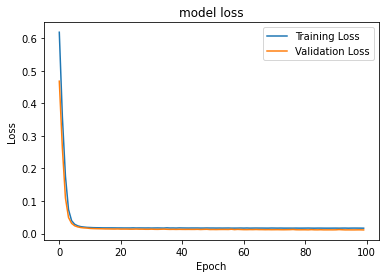

Validation Accuracy: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       272
           1       0.99      0.99      0.99       194

    accuracy                           1.00       466
   macro avg       1.00      1.00      1.00       466
weighted avg       1.00      1.00      1.00       466

Accuracy: 0.9957081545064378
[[271   1]
 [  1 193]]
Precision: 0.9948
Recall: 0.9948
F1 Score: 0.9948
Epoch 1/100
131/131 [==============================] - 1s 2ms/step - loss: 0.2304 - accuracy: 0.9417 - val_loss: 0.0516 - val_accuracy: 0.9893
Epoch 2/100
131/131 [==============================] - 0s 1ms/step - loss: 0.0320 - accuracy: 0.9950 - val_loss: 0.0329 - val_accuracy: 0.9914
Epoch 3/100
131/131 [==============================] - 0s 1ms/step - loss: 0.0211 - accuracy: 0.9947 - val_loss: 0.0296 - val_accuracy: 0.9914
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0187 - accuracy: 0.9945 - val_loss: 0.0299 

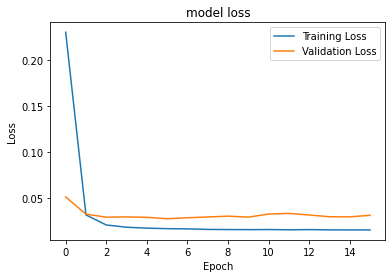

Validation Accuracy: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       265
           1       0.98      1.00      0.99       201

    accuracy                           0.99       466
   macro avg       0.99      0.99      0.99       466
weighted avg       0.99      0.99      0.99       466

Accuracy: 0.9892703862660944
[[260   5]
 [  0 201]]
Precision: 0.9757
Recall: 1.0000
F1 Score: 0.9877
Epoch 1/100
131/131 [==============================] - 1s 2ms/step - loss: 0.2074 - accuracy: 0.9890 - val_loss: 0.0373 - val_accuracy: 0.9957
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0263 - accuracy: 0.9945 - val_loss: 0.0232 - val_accuracy: 0.9957
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0201 - accuracy: 0.9940 - val_loss: 0.0198 - val_accuracy: 0.9957
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0183 - accuracy: 0.9945 - val_loss: 0.0199 

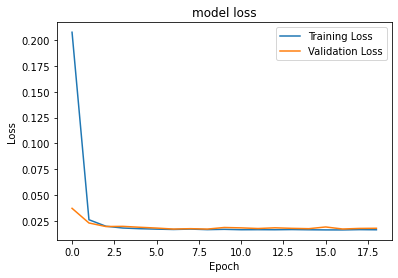

Validation Accuracy: 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       275
           1       0.99      1.00      0.99       190

    accuracy                           1.00       465
   macro avg       0.99      1.00      1.00       465
weighted avg       1.00      1.00      1.00       465

Accuracy: 0.9956989247311828
[[273   2]
 [  0 190]]
Precision: 0.9896
Recall: 1.0000
F1 Score: 0.9948
Epoch 1/100
131/131 [==============================] - 1s 2ms/step - loss: 0.1856 - accuracy: 0.9601 - val_loss: 0.0191 - val_accuracy: 0.9978
Epoch 2/100
131/131 [==============================] - 0s 1ms/step - loss: 0.0251 - accuracy: 0.9943 - val_loss: 0.0107 - val_accuracy: 0.9978
Epoch 3/100
131/131 [==============================] - 0s 1ms/step - loss: 0.0213 - accuracy: 0.9943 - val_loss: 0.0095 - val_accuracy: 0.9978
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0200 - accuracy: 0.9945 - val_loss: 0.0069 

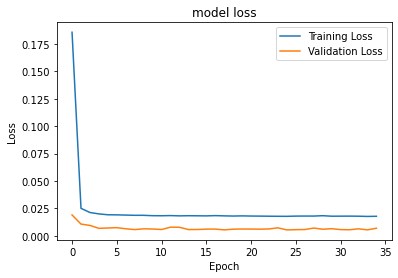

Validation Accuracy: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       241
           1       1.00      1.00      1.00       224

    accuracy                           1.00       465
   macro avg       1.00      1.00      1.00       465
weighted avg       1.00      1.00      1.00       465

Accuracy: 0.9978494623655914
[[241   0]
 [  1 223]]
Precision: 1.0000
Recall: 0.9955
F1 Score: 0.9978
Epoch 1/100
131/131 [==============================] - 1s 2ms/step - loss: 0.1266 - accuracy: 0.9878 - val_loss: 0.0295 - val_accuracy: 0.9935
Epoch 2/100
131/131 [==============================] - 0s 1ms/step - loss: 0.0212 - accuracy: 0.9950 - val_loss: 0.0247 - val_accuracy: 0.9914
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0184 - accuracy: 0.9950 - val_loss: 0.0231 - val_accuracy: 0.9935
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0174 - accuracy: 0.9947 - val_loss: 0.0237 

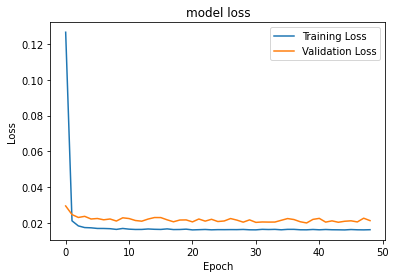

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       264
           1       1.00      0.99      0.99       201

    accuracy                           0.99       465
   macro avg       0.99      0.99      0.99       465
weighted avg       0.99      0.99      0.99       465

Accuracy: 0.9935483870967742
[[264   0]
 [  3 198]]
Precision: 1.0000
Recall: 0.9851
F1 Score: 0.9925
Epoch 1/100
131/131 [==============================] - 1s 2ms/step - loss: 0.1898 - accuracy: 0.9730 - val_loss: 0.0353 - val_accuracy: 0.9892
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0218 - accuracy: 0.9947 - val_loss: 0.0268 - val_accuracy: 0.9892
Epoch 3/100
131/131 [==============================] - 0s 1ms/step - loss: 0.0180 - accuracy: 0.9950 - val_loss: 0.0256 - val_accuracy: 0.9892
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0169 - accuracy: 0.9950 - val_loss: 0.0254 

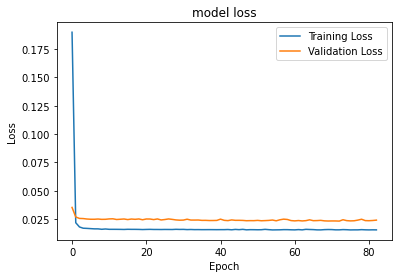

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       242
           1       0.99      0.99      0.99       223

    accuracy                           0.99       465
   macro avg       0.99      0.99      0.99       465
weighted avg       0.99      0.99      0.99       465

Accuracy: 0.9913978494623656
[[240   2]
 [  2 221]]
Precision: 0.9910
Recall: 0.9910
F1 Score: 0.9910
Epoch 1/100
131/131 [==============================] - 1s 2ms/step - loss: 0.2130 - accuracy: 0.9620 - val_loss: 0.0251 - val_accuracy: 0.9978
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0255 - accuracy: 0.9943 - val_loss: 0.0108 - val_accuracy: 0.9978
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0206 - accuracy: 0.9940 - val_loss: 0.0088 - val_accuracy: 0.9978
Epoch 4/100
131/131 [==============================] - 0s 1ms/step - loss: 0.0196 - accuracy: 0.9938 - val_loss: 0.0075 

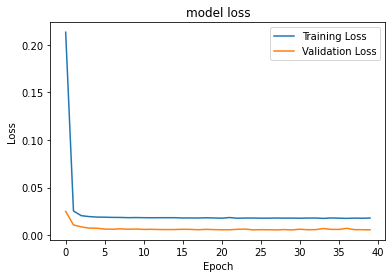

Validation Accuracy: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       280
           1       0.99      1.00      1.00       185

    accuracy                           1.00       465
   macro avg       1.00      1.00      1.00       465
weighted avg       1.00      1.00      1.00       465

Accuracy: 0.9978494623655914
[[279   1]
 [  0 185]]
Precision: 0.9946
Recall: 1.0000
F1 Score: 0.9973
Epoch 1/100
131/131 [==============================] - 1s 2ms/step - loss: 0.1782 - accuracy: 0.9453 - val_loss: 0.0360 - val_accuracy: 0.9892
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0203 - accuracy: 0.9952 - val_loss: 0.0304 - val_accuracy: 0.9892
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0172 - accuracy: 0.9952 - val_loss: 0.0289 - val_accuracy: 0.9892
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0160 - accuracy: 0.9957 - val_loss: 0.0380 

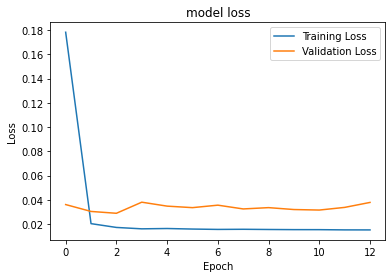

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       273
           1       0.99      0.98      0.99       192

    accuracy                           0.99       465
   macro avg       0.99      0.99      0.99       465
weighted avg       0.99      0.99      0.99       465

Accuracy: 0.989247311827957
[[272   1]
 [  4 188]]
Precision: 0.9947
Recall: 0.9792
F1 Score: 0.9869
Epoch 1/100
131/131 [==============================] - 1s 2ms/step - loss: 0.2450 - accuracy: 0.9396 - val_loss: 0.0299 - val_accuracy: 0.9957
Epoch 2/100
131/131 [==============================] - 0s 1ms/step - loss: 0.0268 - accuracy: 0.9938 - val_loss: 0.0152 - val_accuracy: 0.9978
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0211 - accuracy: 0.9943 - val_loss: 0.0118 - val_accuracy: 0.9978
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0200 - accuracy: 0.9943 - val_loss: 0.0105 -

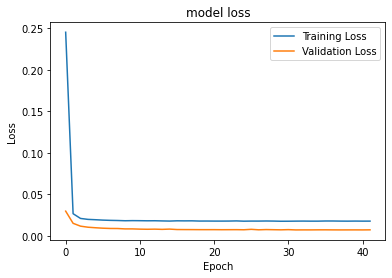

Validation Accuracy: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       273
           1       0.99      1.00      1.00       192

    accuracy                           1.00       465
   macro avg       1.00      1.00      1.00       465
weighted avg       1.00      1.00      1.00       465

Accuracy: 0.9978494623655914
[[272   1]
 [  0 192]]
Precision: 0.9948
Recall: 1.0000
F1 Score: 0.9974
Epoch 1/100
131/131 [==============================] - 1s 2ms/step - loss: 0.2068 - accuracy: 0.9494 - val_loss: 0.0288 - val_accuracy: 0.9978
Epoch 2/100
131/131 [==============================] - 0s 1ms/step - loss: 0.0257 - accuracy: 0.9945 - val_loss: 0.0164 - val_accuracy: 0.9978
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0203 - accuracy: 0.9943 - val_loss: 0.0142 - val_accuracy: 0.9978
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0190 - accuracy: 0.9945 - val_loss: 0.0128 

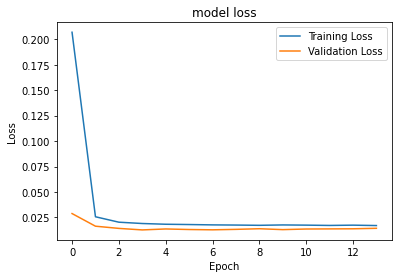

Validation Accuracy: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       274
           1       0.99      0.99      0.99       191

    accuracy                           1.00       465
   macro avg       1.00      1.00      1.00       465
weighted avg       1.00      1.00      1.00       465

Accuracy: 0.9956989247311828
[[273   1]
 [  1 190]]
Precision: 0.9948
Recall: 0.9948
F1 Score: 0.9948
Average Validation Accuracy: 0.9944118325718769


In [9]:
from sklearn.model_selection import KFold
import tensorflow as tf

optimizer1=tf.keras.optimizers.Adam(learning_rate=0.0005)


from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=10)
n_split = 10
acc = 0
kf = KFold(n_split, random_state=10, shuffle=True)
for train, val in kf.split(x, y):
  val_acc = model_aa(x[train], x[val], y[train], y[val], optimizer1, early_stopping_monitor)
  acc = acc + val_acc

print("Average Validation Accuracy:",acc/n_split)

